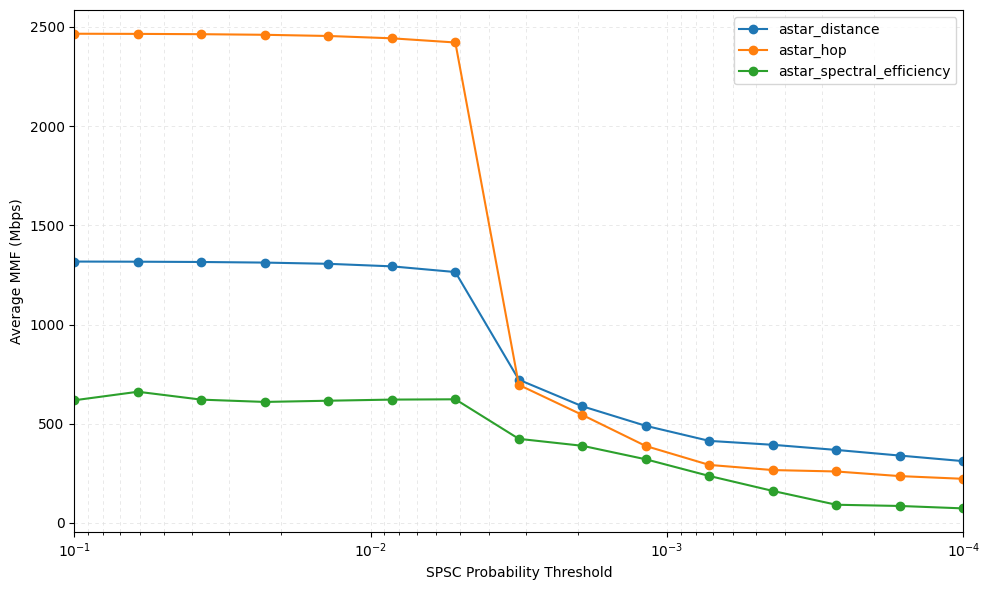

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter

# Base directory where experiment results are saved
base_dir = "../results_mmf_vs_spsc"

# Define thresholds from logspace
raw_logspace = np.logspace(-4, -1, 15, base=10)
thresholds = 1 - raw_logspace  # Same as in main_experiment()

# Dictionary to store average throughput per scheme for each threshold
results_by_threshold = {}

# Loop through each threshold
for threshold in thresholds:
    threshold_str = f"spsc_{threshold:.4f}"
    thresh_path = os.path.join(base_dir, threshold_str)
    
    if not os.path.isdir(thresh_path):
        continue

    # Get all experiment directories within this threshold directory
    exp_dirs = [d for d in os.listdir(thresh_path) if d.startswith("exp_") and os.path.isdir(os.path.join(thresh_path, d))]

    scheme_results = {}
    # Process each experiment
    for exp_dir in exp_dirs:
        result_file = os.path.join(thresh_path, exp_dir, "result.json")
        if os.path.isfile(result_file):
            with open(result_file, "r") as f:
                result_data = json.load(f)
            for scheme, throughput in result_data.items():
                if scheme not in scheme_results:
                    scheme_results[scheme] = []
                scheme_results[scheme].append(throughput)

    # Compute average throughput for each scheme at the current threshold
    if scheme_results:
        avg_results = {scheme: np.mean(values) for scheme, values in scheme_results.items()}
        results_by_threshold[threshold] = avg_results

# Extract all unique scheme names across thresholds
all_schemes = set()
for res in results_by_threshold.values():
    all_schemes.update(res.keys())
all_schemes = sorted(list(all_schemes))

# Plot average throughput for each scheme as a function of threshold
plt.figure(figsize=(10, 6))
for scheme in all_schemes:
    avg_throughputs = []
    for thresh in thresholds:
        val = results_by_threshold.get(thresh, {}).get(scheme, np.nan)
        avg_throughputs.append(val if val is not None else np.nan)
    plt.plot(raw_logspace, avg_throughputs, marker='o', label=scheme)

plt.xlim(min(raw_logspace), max(raw_logspace))
plt.xscale("log")
plt.xlabel("SPSC Probability Threshold")
plt.xticks()
plt.gca().invert_xaxis()

plt.ylabel("Average MMF (Mbps)")
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.offsetText.set_text("×10³")

plt.legend()
plt.grid(True, which='both', linestyle=(0, (5, 5)), linewidth=0.5, color="#e0e0e0")
plt.tight_layout()
plt.show()


In [34]:
exp_dirs

['exp_051',
 'exp_037',
 'exp_177',
 'exp_062',
 'exp_181',
 'exp_186',
 'exp_227',
 'exp_102',
 'exp_175',
 'exp_260',
 'exp_056',
 'exp_251',
 'exp_207',
 'exp_284',
 'exp_169',
 'exp_114',
 'exp_215',
 'exp_098',
 'exp_250',
 'exp_034',
 'exp_151',
 'exp_281',
 'exp_141',
 'exp_143',
 'exp_059',
 'exp_167',
 'exp_064',
 'exp_157',
 'exp_132',
 'exp_041',
 'exp_283',
 'exp_252',
 'exp_234',
 'exp_003',
 'exp_176',
 'exp_180',
 'exp_032',
 'exp_124',
 'exp_225',
 'exp_016',
 'exp_291',
 'exp_193',
 'exp_254',
 'exp_073',
 'exp_036',
 'exp_249',
 'exp_112',
 'exp_236',
 'exp_297',
 'exp_280',
 'exp_244',
 'exp_024',
 'exp_228',
 'exp_046',
 'exp_091',
 'exp_205',
 'exp_014',
 'exp_108',
 'exp_243',
 'exp_060',
 'exp_127',
 'exp_240',
 'exp_077',
 'exp_220',
 'exp_272',
 'exp_168',
 'exp_178',
 'exp_126',
 'exp_161',
 'exp_278',
 'exp_261',
 'exp_025',
 'exp_071',
 'exp_129',
 'exp_086',
 'exp_172',
 'exp_120',
 'exp_042',
 'exp_214',
 'exp_221',
 'exp_015',
 'exp_235',
 'exp_156',
 'ex